In [2556]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy
import statsmodels.api as sm
from sklearn import linear_model



In [2557]:
het_files = glob.glob("rec_lattice_bounds/sim_data_hets/het*.txt")
vel_files = glob.glob("rec_lattice_bounds/sim_data_hets/pop*.txt")
sect_files = glob.glob("rec_lattice_bounds/sim_data_hets/sects*.txt")

In [2558]:
K_str = ["K10000_","K20000_","K50000_"] 
K_var = [10000, 20000, 50000]

B_str = ["B0","B3.5","B6"]
B_var = [0,3.5,6]

In [2559]:
n_gens = lambda B, K:  5*(B+1)*K

In [2560]:
df = pd.DataFrame(columns=['K','B',"het_exp", "vel_exp","diff_exp","sect_exp",
                                             'h_err','v_err','d_err','s_err',
                                             "het_samples","vel_samples","het_0"])

In [2561]:
buff = 100
buffe=400
ts=[[10,35,7],[300,50,35],[400,225,50]]
tf= [[150,100,15],[360,275,75],[500,400,150]]

ts_s=[[10,35,11],[300,50,20],[400,225,50]]
tf_s= [[150,100,60],[360,275,200],[500,400,150]]

arr_means = np.zeros((3,3,4,500))
#het_sub_files=[]
#vel_sub_files=[]
#sect_sub_files=[]
for Kn, Ki,K in zip(range(len(K_var)),K_var,K_str):
    for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):

        het_sub_files=[]
        vel_sub_files=[]
        sect_sub_files=[]
        for fh in het_files:
            if K in fh and B in fh:
                het_sub_files.append(fh)
        for fv in vel_files:       
            if K in fv and B in fv:
                vel_sub_files.append(fv)
        for fs in sect_files:
            if K in fs and B in fs:
                sect_sub_files.append(fs)
                
                
        arrh =  []
        #np.zeros((len(het_sub_files),500,2))
        arrv = []
        #np.zeros((len(vel_sub_files),500,2))
        arrs = []
        #print(Bi)
        for i,fh,fv,fs in zip(range(len(het_sub_files)),het_sub_files,vel_sub_files,sect_sub_files):
            if len(np.loadtxt(fh,delimiter =  ', '))>0:
            
                if np.loadtxt(fh,delimiter =  ', ')[-1,1]< .3: 

                    arrh.append(np.loadtxt(fh,delimiter =  ', '))
            #print(np.loadtxt(fv,delimiter =  ', ')[-1,1],np.loadtxt(fv,delimiter =  ', ')[0,1])
            if len(np.loadtxt(fv,delimiter =  ', '))>0:
                if np.loadtxt(fv,delimiter =  ', ')[-1,1] > np.loadtxt(fv,delimiter =  ', ')[0,1]*(1.5)*(.5*Bi+1):
                    arrv.append(np.loadtxt(fv,delimiter =  ', '))
            #else:
            #    print(i)
            if len(np.loadtxt(fs,delimiter =  ', '))>0:
                arrs.append(np.loadtxt(fs,delimiter =  ', '))
            #print(i)
            #print(np.mean(arrh))

        arrh=np.array(arrh)
        arrv=np.array(arrv)
        arrs=np.array(arrs)
            
            
        het_mean = np.mean(arrh[:,:,1],axis=0)
        vel_mean = np.mean(arrv[:,:,1],axis=0)
        vel_var = np.std(arrv[:,:,1],axis=0)**2
        arr_means[Bn,Kn,0] = np.mean(arrh[:,:,1],axis=0)
        arr_means[Bn,Kn,1] = np.mean(arrv[:,:,1],axis=0)
        arr_means[Bn,Kn,2] =  np.std(arrv[:,:,1],axis=0)**2
        #plt.plot(vel_mean)
        
            
        sect_mean = np.mean(arrs[:,:,1],axis=0)
        arr_means[Bn,Kn,3]= np.mean(arrs[:,:,1],axis=0)
        het_fit = curve_fit(lambda t,a,b: -b*t + a,  
                            arrh[0,ts[Bn][Kn]:tf[Bn][Kn],0], np.log(het_mean[ts[Bn][Kn]:tf[Bn][Kn]]),
                            absolute_sigma=True)
        print(arrv[0,buff:,0])
        #print(ts[Bn][Kn])
        #print(tf[Bn][Kn])

            
        vel_fit = curve_fit(lambda t,a,v: v*t + a,  
                            arrv[0,buff:buffe,0], vel_mean[buff:buffe],
                            absolute_sigma=True)
        #print(arrv[0,buff:,0])
        diff_fit = curve_fit(lambda t,a,D: 2*D*t + a,  
                            arrv[0,buff:buffe,0], vel_var[buff:buffe],
                             absolute_sigma=True)
        #print(arrv[0,buff:,0])
        sect_fit = curve_fit(lambda t,a,b: -b*t + a,  
                            arrs[0,ts_s[Bn][Kn]:tf_s[Bn][Kn],0], np.log(sect_mean[ts_s[Bn][Kn]:tf_s[Bn][Kn]]),absolute_sigma=True)
        #print(arrv[0,buff:,0])
        df = df.append(pd.DataFrame(data=[[Ki,Bi,het_fit[0][1],vel_fit[0][1],diff_fit[0][1],sect_fit[0][1],
                                           het_fit[1][1,1],vel_fit[1][1,1],diff_fit[1][1,1],sect_fit[1][1,1],
                                           len(arrh),len(arrv),np.sum(arrh[:,-1,1]==0)]],
                                    columns=['K','B',"het_exp", "vel_exp","diff_exp","sect_exp",
                                             'h_err','v_err','d_err','s_err',
                                             "het_samples","vel_samples","het_0"]))
                
                
                           

[10000. 10100. 10200. 10300. 10400. 10500. 10600. 10700. 10800. 10900.
 11000. 11100. 11200. 11300. 11400. 11500. 11600. 11700. 11800. 11900.
 12000. 12100. 12200. 12300. 12400. 12500. 12600. 12700. 12800. 12900.
 13000. 13100. 13200. 13300. 13400. 13500. 13600. 13700. 13800. 13900.
 14000. 14100. 14200. 14300. 14400. 14500. 14600. 14700. 14800. 14900.
 15000. 15100. 15200. 15300. 15400. 15500. 15600. 15700. 15800. 15900.
 16000. 16100. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000. 17100. 17200. 17300. 17400. 17500. 17600. 17700. 17800. 17900.
 18000. 18100. 18200. 18300. 18400. 18500. 18600. 18700. 18800. 18900.
 19000. 19100. 19200. 19300. 19400. 19500. 19600. 19700. 19800. 19900.
 20000. 20100. 20200. 20300. 20400. 20500. 20600. 20700. 20800. 20900.
 21000. 21100. 21200. 21300. 21400. 21500. 21600. 21700. 21800. 21900.
 22000. 22100. 22200. 22300. 22400. 22500. 22600. 22700. 22800. 22900.
 23000. 23100. 23200. 23300. 23400. 23500. 23600. 23700. 23800. 23900.
 24000

[20000. 20200. 20400. 20600. 20800. 21000. 21200. 21400. 21600. 21800.
 22000. 22200. 22400. 22600. 22800. 23000. 23200. 23400. 23600. 23800.
 24000. 24200. 24400. 24600. 24800. 25000. 25200. 25400. 25600. 25800.
 26000. 26200. 26400. 26600. 26800. 27000. 27200. 27400. 27600. 27800.
 28000. 28200. 28400. 28600. 28800. 29000. 29200. 29400. 29600. 29800.
 30000. 30200. 30400. 30600. 30800. 31000. 31200. 31400. 31600. 31800.
 32000. 32200. 32400. 32600. 32800. 33000. 33200. 33400. 33600. 33800.
 34000. 34200. 34400. 34600. 34800. 35000. 35200. 35400. 35600. 35800.
 36000. 36200. 36400. 36600. 36800. 37000. 37200. 37400. 37600. 37800.
 38000. 38200. 38400. 38600. 38800. 39000. 39200. 39400. 39600. 39800.
 40000. 40200. 40400. 40600. 40800. 41000. 41200. 41400. 41600. 41800.
 42000. 42200. 42400. 42600. 42800. 43000. 43200. 43400. 43600. 43800.
 44000. 44200. 44400. 44600. 44800. 45000. 45200. 45400. 45600. 45800.
 46000. 46200. 46400. 46600. 46800. 47000. 47200. 47400. 47600. 47800.
 48000

[ 50000.  50500.  51000.  51500.  52000.  52500.  53000.  53500.  54000.
  54500.  55000.  55500.  56000.  56500.  57000.  57500.  58000.  58500.
  59000.  59500.  60000.  60500.  61000.  61500.  62000.  62500.  63000.
  63500.  64000.  64500.  65000.  65500.  66000.  66500.  67000.  67500.
  68000.  68500.  69000.  69500.  70000.  70500.  71000.  71500.  72000.
  72500.  73000.  73500.  74000.  74500.  75000.  75500.  76000.  76500.
  77000.  77500.  78000.  78500.  79000.  79500.  80000.  80500.  81000.
  81500.  82000.  82500.  83000.  83500.  84000.  84500.  85000.  85500.
  86000.  86500.  87000.  87500.  88000.  88500.  89000.  89500.  90000.
  90500.  91000.  91500.  92000.  92500.  93000.  93500.  94000.  94500.
  95000.  95500.  96000.  96500.  97000.  97500.  98000.  98500.  99000.
  99500. 100000. 100500. 101000. 101500. 102000. 102500. 103000. 103500.
 104000. 104500. 105000. 105500. 106000. 106500. 107000. 107500. 108000.
 108500. 109000. 109500. 110000. 110500. 111000. 11

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: loadtxt: Empty input file: "rec_lattice_bounds/sim_data_hets/het_K50000_M0.25_B6_G0.01_2020-07-28-11-29-41.txt"
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: loadtxt: Empty input file: "rec_lattice_bounds/sim_data_hets/sects_K50000_M0.25_B6_G0.01_2020-07-28-11-29-41.txt"
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: loadtxt: Empty input file: "rec_lattice_bounds/sim_data_hets/pop_K50000_M0.25_B6_G0.01_2020-07-28-11-29-41.txt"


[ 350000.  353500.  357000.  360500.  364000.  367500.  371000.  374500.
  378000.  381500.  385000.  388500.  392000.  395500.  399000.  402500.
  406000.  409500.  413000.  416500.  420000.  423500.  427000.  430500.
  434000.  437500.  441000.  444500.  448000.  451500.  455000.  458500.
  462000.  465500.  469000.  472500.  476000.  479500.  483000.  486500.
  490000.  493500.  497000.  500500.  504000.  507500.  511000.  514500.
  518000.  521500.  525000.  528500.  532000.  535500.  539000.  542500.
  546000.  549500.  553000.  556500.  560000.  563500.  567000.  570500.
  574000.  577500.  581000.  584500.  588000.  591500.  595000.  598500.
  602000.  605500.  609000.  612500.  616000.  619500.  623000.  626500.
  630000.  633500.  637000.  640500.  644000.  647500.  651000.  654500.
  658000.  661500.  665000.  668500.  672000.  675500.  679000.  682500.
  686000.  689500.  693000.  696500.  700000.  703500.  707000.  710500.
  714000.  717500.  721000.  724500.  728000.  7315

In [2562]:
df[['K']]=df[['K']].astype(int)
df[df.columns[1:]]= df[df.columns[1:]].astype(float)

In [2563]:
df

,K,B,het_exp,vel_exp,diff_exp,sect_exp,h_err,v_err,d_err,s_err,het_samples,vel_samples,het_0
0,10000,0.0,1.443542e-04,0.048564,0.000600,7.518715e-05,4.373401e-10,4.444494e-11,1.111123e-11,4.373401e-10,52.0,52.0,52.0
0,10000,3.5,2.793012e-05,0.052273,0.000082,7.265100e-06,2.744246e-10,2.194812e-12,5.487029e-13,2.744247e-10,49.0,52.0,45.0
0,10000,6.0,1.105452e-05,0.058061,0.000063,2.794807e-06,2.449225e-11,9.070396e-13,2.267599e-13,2.449225e-11,35.0,52.0,22.0
0,20000,0.0,1.376892e-04,0.048822,0.002069,4.972089e-05,1.092657e-09,1.111123e-11,2.777809e-12,1.092657e-09,52.0,52.0,52.0
0,20000,3.5,1.171710e-05,0.052280,-0.000063,5.304485e-06,1.300640e-12,5.487029e-13,1.371757e-13,1.300640e-12,49.0,52.0,48.0
0,20000,6.0,2.966106e-06,0.058060,-0.000072,1.366146e-06,1.142419e-12,2.267599e-13,5.668997e-14,1.142418e-12,40.0,52.0,26.0
0,50000,0.0,1.051111e-04,0.049027,0.000761,3.659742e-05,9.523810e-08,1.777798e-12,4.444494e-13,4.081633e-10,52.0,52.0,52.0
0,50000,3.5,5.131367e-06,0.052276,0.000010,2.435721e-06,3.706020e-11,8.779247e-14,2.194812e-14,4.064547e-13,50.0,52.0,50.0
0,50000,6.0,8.357493e-07,0.058054,-0.000010,3.958987e-07,9.796898e-13,3.628157e-14,9.070395e-15,9.796898e-13,29.0,49.0,18.0


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


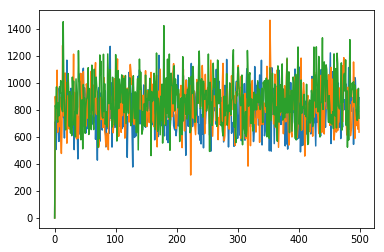

In [2569]:
plt.plot(arr_means[2,0,2,:])
plt.plot(arr_means[2,1,2,:])
plt.plot(arr_means[2,2,2,:])

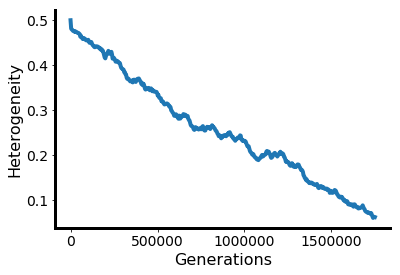

In [2565]:
fig,ax=plt.subplots()

ax.plot(np.linspace(0,1750000,500),arr_means[2,2,0,:],lw=4)
ax.set_ylabel('Heterogeneity',fontsize = 16)
ax.set_xlabel('Generations',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

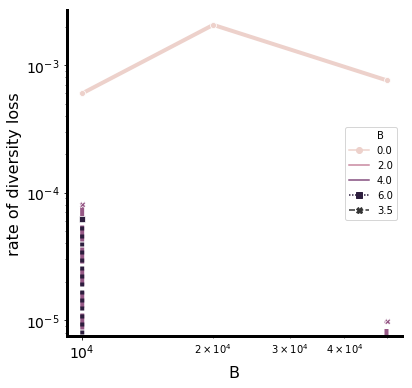

In [2566]:
fig,ax=plt.subplots(figsize=(6,6))
grid= sns.lineplot(x='K',y='diff_exp',hue='B',data=df,ax=ax,ci=None,style='B', markers=True)
lw = ax.lines[0].get_linewidth() # lw of first line
plt.setp(ax.lines,linewidth=4) 
ax.set_ylabel('rate of diversity loss',fontsize=16)
ax.set_xlabel('B',fontsize=16)
#grid.set(xscale="log", yscale="log")
ax.set(xscale="log", yscale="log")
plt.tick_params(axis='both', which='major', labelsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

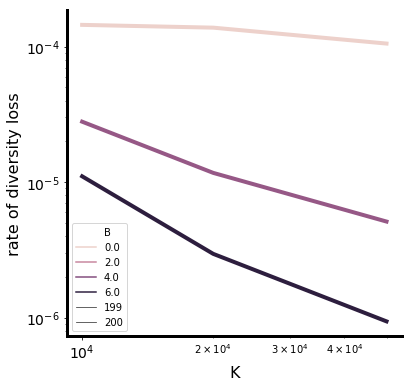

In [2480]:
fig,ax=plt.subplots(figsize=(6,6))
grid= sns.lineplot(x='K',y='het_exp',hue='B',data=df,ax=ax,ci=None, markers=True,size=200,lw=12)
lw = ax.lines[0].get_linewidth() # lw of first line
plt.setp(ax.lines,linewidth=4) 
ax.set_ylabel('rate of diversity loss',fontsize=16)
ax.set_xlabel('K',fontsize=16)
#grid.set(xscale="log", yscale="log")
ax.set(xscale="log", yscale="log")
plt.tick_params(axis='both', which='major', labelsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

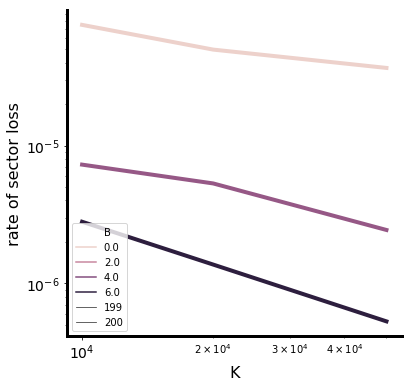

In [2488]:
fig,ax=plt.subplots(figsize=(6,6))
grid= sns.lineplot(x='K',y='sect_exp',hue='B',data=df,ax=ax,ci=None, markers=True,size=200)
ax.set_ylabel('rate of sector loss',fontsize=16)
plt.setp(ax.lines,linewidth=4) 
ax.set_xlabel('K',fontsize=16)
#grid.set(xscale="log", yscale="log")
ax.set(xscale="log", yscale="log")
plt.tick_params(axis='both', which='major', labelsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [2410]:
diverse=[]
for B in df['B'].unique():
    df_reg = df.loc[df['B']==B,:]
    x = np.log(df.loc[df['B']==B,['K']])
    y = np.log(df.loc[df['B']==B,'het_exp'])
    lm = linear_model.LinearRegression()
    model = lm.fit(x,y)

    # Print out the statistics
    diverse.append(model.coef_[0])
    
    

In [2411]:
sector_loss=[]
for B in df['B'].unique():
    df_reg = df.loc[df['B']==B,:]
    x = np.log(df.loc[df['B']==B,['K']])
    y = np.log(df.loc[df['B']==B,'sect_exp'])
    lm = linear_model.LinearRegression()
    model = lm.fit(x,y)

    # Print out the statistics
    sector_loss.append(model.coef_[0])
    
    

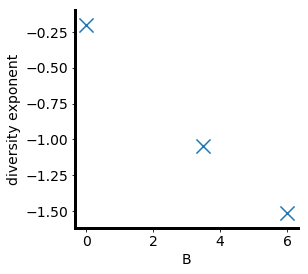

In [2412]:
fix,ax=plt.subplots(figsize=(4,4))
ax.scatter(df['B'].unique(),diverse,marker='x',s=200)
ax.set_xlabel('B', fontsize=14)
ax.set_ylabel('diversity exponent', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


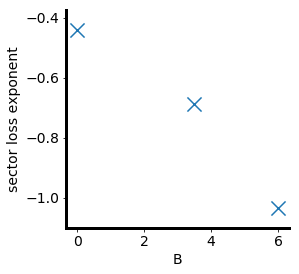

In [2413]:
fix,ax=plt.subplots(figsize=(4,4))
ax.scatter(df['B'].unique(),sector_loss,marker='x',s=200)
ax.set_xlabel('B', fontsize=14)
ax.set_ylabel('sector loss exponent', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [2490]:
df

,K,B,het_exp,vel_exp,diff_exp,sect_exp,h_err,v_err,d_err,s_err,het_samples,vel_samples,het_0
0,10000,0.0,1.443542e-04,0.048577,1.261916e-03,7.518715e-05,4.373401e-10,1.316879e-11,3.292197e-12,4.373401e-10,52.0,52.0,52.0
0,10000,3.5,2.793012e-05,0.052271,8.107216e-05,7.265100e-06,2.744246e-10,6.503106e-13,1.625776e-13,2.744247e-10,49.0,52.0,45.0
0,10000,6.0,1.105452e-05,0.058062,6.202291e-05,2.794807e-06,2.449225e-11,2.687508e-13,6.718770e-14,2.449225e-11,35.0,52.0,22.0
0,20000,0.0,1.376892e-04,0.048831,1.704486e-03,4.972089e-05,1.092657e-09,3.292197e-12,8.230493e-13,1.092657e-09,52.0,52.0,52.0
0,20000,3.5,1.171710e-05,0.052276,4.149728e-06,5.304485e-06,1.300640e-12,1.625777e-13,4.064441e-14,1.300640e-12,49.0,52.0,48.0
0,20000,6.0,2.966106e-06,0.058059,-7.354164e-06,1.366146e-06,1.142419e-12,6.718769e-14,1.679693e-14,1.142418e-12,40.0,52.0,26.0
0,50000,0.0,1.051111e-04,0.049019,6.347416e-04,3.659742e-05,9.523810e-08,5.267516e-13,1.316879e-13,4.081633e-10,52.0,52.0,52.0
0,50000,3.5,5.131367e-06,0.052276,1.657536e-05,2.435721e-06,3.706020e-11,2.601242e-14,6.503106e-15,4.064547e-13,50.0,52.0,50.0
0,50000,6.0,9.434772e-07,0.058054,5.858751e-07,5.283185e-07,9.796898e-13,1.075003e-14,2.687508e-15,9.796898e-13,26.0,42.0,17.0


In [3]:
(2*.2)**.5

0.6324555320336759